In [3]:
# cargamos librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [5]:
# cargmos los datos 
dataframe = pd.read_csv('https://raw.githubusercontent.com/robintux/Datasets4StackOverFlowQuestions/master/comprar_alquilar.csv')
dataframe.tail(10)


,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
192,4653,1024,447,703,16952,392957,0,0,3,0
193,3390,881,194,584,34601,304112,2,2,5,0
194,2969,623,72,620,29663,289205,2,2,6,0
195,4169,1292,48,333,28503,239872,2,1,7,1
196,4054,1095,371,440,22183,223971,1,0,3,0
197,3831,690,352,488,10723,363120,0,0,2,0
198,3961,1030,270,475,21880,280421,2,3,8,0
199,3184,955,276,684,35565,388025,1,3,8,0
200,3334,867,369,652,19985,376892,1,2,5,0
201,3988,1157,105,382,11980,257580,0,0,4,0


In [16]:
# Paso previo : normalizar/escalar la data 
scaler = StandardScaler()
# remover la variable dependiente
df = dataframe.drop(['comprar'], axis = 1)
scaler.fit(df)

# finalmente normalizamos los datos  :  mu = 0 , std= 1
X_scaled = scaler.transform(df)

X_scaled.shape

np.mean(X_scaled[:,1])
np.std(X_scaled[:,1])


1.0

In [52]:
# Instanciamos el objeto PCA 
pca = PCA(n_components= 5)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

print('Dimenciones del objeto PCA')
X_pca.shape

Dimenciones del objeto PCA


(202, 5)

In [53]:
#  cuanto de la informacion se mantiene
expl = pca.explained_variance_ratio_
print(expl)
print("Cuanta info se tiene en lo ejes principales " , sum(expl))


[0.29913557 0.23294923 0.11711241 0.10685622 0.09635279]
Cuanta info se tiene en lo ejes principales  0.852406211771431


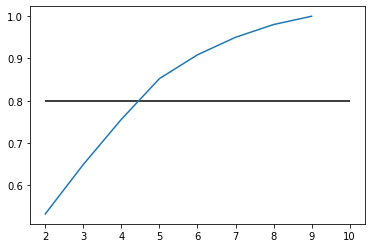

In [49]:
listINFO = []

for i in range(2,10) :
  pca = PCA(n_components= i)
  pca.fit(X_scaled)
  X_pca = pca.transform(X_scaled)
  expl = sum(pca.explained_variance_ratio_)
  listINFO.append(expl)

plt.plot(range(2,10) , listINFO)
plt.hlines(y = .80, xmin=2, xmax = 10)
plt.show()
